In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Input

In [2]:
# 데이터 불러오기 및 전처리
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# 2. CNN 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Conv Layer 1
    layers.MaxPooling2D((2, 2)),                                           # Pooling 1
    layers.Conv2D(64, (3, 3), activation='relu'),                          # Conv Layer 2
    layers.MaxPooling2D((2, 2)),                                           # Pooling 2
    layers.Conv2D(64, (3, 3), activation='relu'),                          # Conv Layer 3
    layers.Flatten(),                                                     # 2D → 1D
    layers.Dense(64, activation='relu'),                                  # FC Layer
    layers.Dense(10, activation='softmax')                                # Output Layer
])

/Users/park-yeonseo/tensorflow_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# 3. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# 4. 모델 요약 출력
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 5. 모델 학습
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8568 - loss: 0.4563 - val_accuracy: 0.9823 - val_loss: 0.0566
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9823 - loss: 0.0566 - val_accuracy: 0.9873 - val_loss: 0.0437
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9875 - loss: 0.0366 - val_accuracy: 0.9875 - val_loss: 0.0430
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9910 - loss: 0.0266 - val_accuracy: 0.9892 - val_loss: 0.0362
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9920 - loss: 0.0244 - val_accuracy: 0.9902 - val_loss: 0.0349


In [9]:
# 6. 테스트 데이터로 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\n 테스트 정확도: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9863 - loss: 0.0421 

 테스트 정확도: 0.9898


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   


/var/folders/tx/rw4964jj7qjgx3sd1vrtdgz00000gn/T/ipykernel_43995/1479749493.py:26: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/tx/rw4964jj7qjgx3sd1vrtdgz00000gn/T/ipykernel_43995/1479749493.py:26: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/tx/rw4964jj7qjgx3sd1vrtdgz00000gn/T/ipykernel_43995/1479749493.py:26: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/tx/rw4964jj7qjgx3sd1vrtdgz00000gn/T/ipykernel_43995/1479749493.py:26: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/park-yeonseo/tensorflow_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/park-yeonseo/

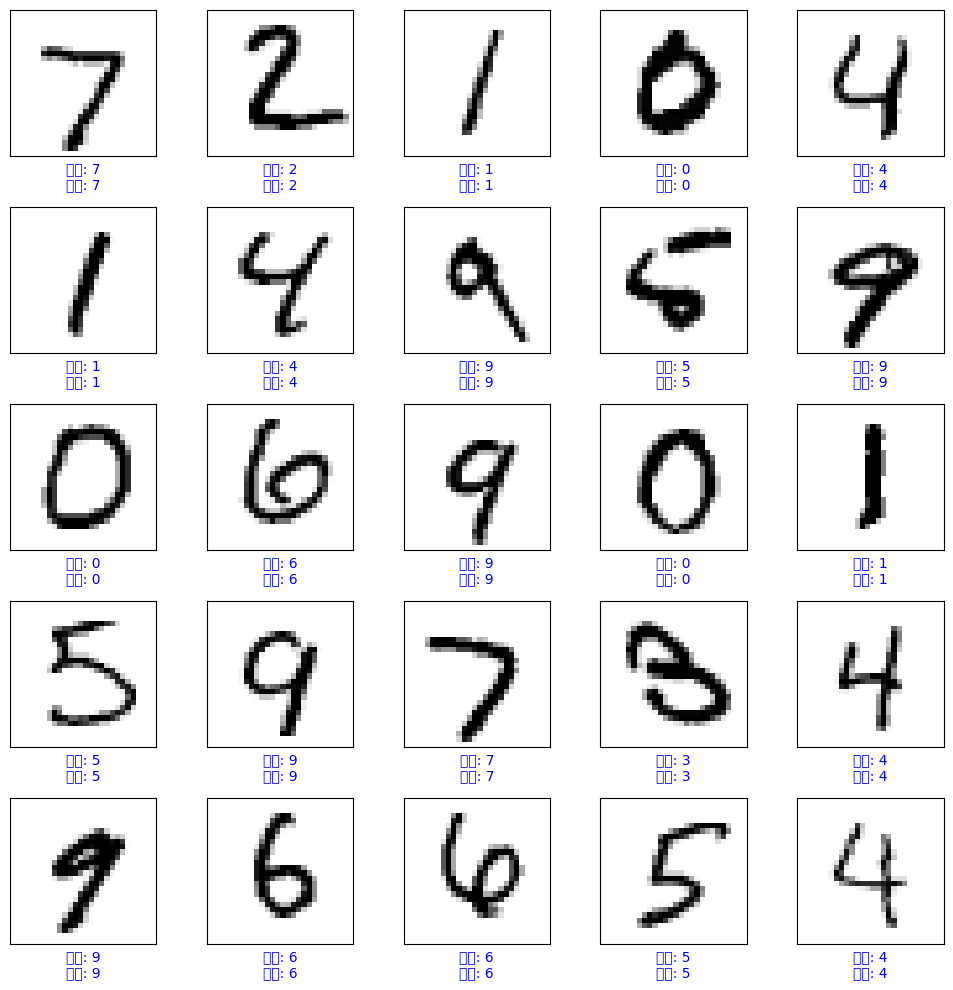

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 7. 테스트 이미지에서 25개 예측
predictions = model.predict(test_images)
num_images = 25
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    # 이미지 출력
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    
    # 예측 결과와 실제 레이블
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    
    # 예측이 맞았는지에 따라 색상 다르게
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"예측: {predicted_label}\n정답: {true_label}", color=color)

plt.tight_layout()
plt.show()
